In [1]:
using Pkg
Pkg.activate(".")
using LatticeCircuits

  Activating project at `~/github/LatticeCircuits`


In [12]:
printMetadata()

┌ Info: Metadata loaded.
└ @ LatticeCircuits /Users/danielsimm/github/LatticeCircuits/src/metadataHandling.jl:98


┌───────────────────────┬─────────────────┬──────┬────────────────┬────────────────┬──────────────┐
│              Filename │ Simulation Type │    L │ # Trajectories │ # Measurements │ Metadata OK? │
├───────────────────────┼─────────────────┼──────┼────────────────┼────────────────┼──────────────┤
│    KekuleChainFull120 │     ChainKekule │  120 │            500 │            100 │         true │
│        PPcritical1024 │         ChainPP │ 1024 │            240 │            100 │         true │
│         PPcritical256 │         ChainPP │  256 │            240 │            100 │         true │
│         PPcritical512 │         ChainPP │  512 │            240 │            100 │         true │
│ PPphasetransition1024 │         ChainPP │ 1024 │            600 │            100 │        false │
│  PPphasetransition128 │         ChainPP │  128 │            600 │            100 │        false │
│  PPphasetransition256 │         ChainPP │  256 │            600 │            100 │        false │


In [14]:
params, I3 = evaluate(loadSimulation("KekuleChainFull120"), :I3)

(Vector{Real}[[1//1, 0//1, 0//1], [25//27, 1//27, 1//27], [23//27, 2//27, 2//27], [7//9, 1//9, 1//9], [19//27, 4//27, 4//27], [17//27, 5//27, 5//27], [5//9, 2//9, 2//9], [13//27, 7//27, 7//27], [11//27, 8//27, 8//27], [1//3, 1//3, 1//3]  …  [59//162, 8//27, 55//162], [5//9, 0//1, 4//9], [43//81, 1//27, 35//81], [41//81, 2//27, 34//81], [13//27, 1//9, 11//27], [37//81, 4//27, 32//81], [35//81, 5//27, 31//81], [11//27, 2//9, 10//27], [31//81, 7//27, 29//81], [29//81, 8//27, 28//81]], [0.0, 0.0, 0.01624, 0.08226, 0.12836, 0.13201999999999994, 0.13444000000000003, 0.15131999999999995, 0.14421999999999996, 0.13627999999999996  …  0.1376, 0.0, 0.07624, 0.12030000000000002, 0.13663999999999998, 0.13618, 0.13761999999999994, 0.12462000000000004, 0.15369999999999995, 0.12422000000000001])

In [15]:
using CairoMakie
using Colors
using ColorSchemes
using GeometryBasics

In [16]:
function voronoi_tesselation_plot(positions, values)
    posterblue = colorant"#3498DB";
    postergreen = colorant"#46AD77";
    posterred = colorant"#E74C3C";
    posterblack = colorant"#1C2833";
    posterdarkblue = colorant"#2980B9";
    posterdark = colorant"#2C3E50";
    background = colorant"#ECF0F1";
    highlightcolor = colorant"#F29325";
    postercolormap1 = ColorScheme(range(posterred, posterblue));
    unique_indices = unique(i -> positions[i], eachindex(positions))
    unique_positions = positions[unique_indices]
    unique_values = values[unique_indices]
    unique_colors = get(postercolormap1, (unique_values.+1)./2)
    x_pos = [p[1] for p in unique_positions] .+1
    y_pos = [p[2] for p in unique_positions] .+1

    fig = Figure(backgroundcolor = background)
    axis = Axis(fig[1,1],aspect=1)
    xlims!(axis, 0.9, 2.1)
    ylims!(axis, 0.9, sqrt(3)/2+1+0.1)

    hidedecorations!(axis)
    hidespines!(axis)
    
    voronoiplot!(axis, Float64.(x_pos), Float64.(y_pos), Float64.(unique_values), show_generators=false, strokewidth=0.01, colormap = postercolormap1, unbounded_edge_extension_factor = 0.01)
    
    triangle = Point2f[(1,1),(1.5,sqrt(3)/2+1),(2,1),(1,1)]
    poly!(Polygon(Point2f[(0.5, 0.5), (2.5, 0.5), (2.5, 2.5), (0.5, 2.5)], [triangle]), color = background)
    lines!(axis,triangle,color=:black, linewidth=1)
    
    text!(axis, 1+0.5, 1+sqrt(3)/2+0.05, text=L"p_z", fontsize=40, align=(:center, :center))
    text!(axis, 1-0.05, 1-0.05, text=L"p_x", fontsize=40, align=(:center, :center))
    text!(axis, 1+1.05, 1-0.05, text=L"p_y", fontsize=40, align=(:center, :center))

    Colorbar(fig[1,2], limits=(-1,1),colormap = postercolormap1, label=L"I(A:B:C)", labelsize=25, alignmode=Outside(), height=400, width=25, tellheight=false, #=ticklabelfont=:LaTeX,=# ticklabelsize=20)
    
    return fig
end

voronoi_tesselation_plot (generic function with 1 method)

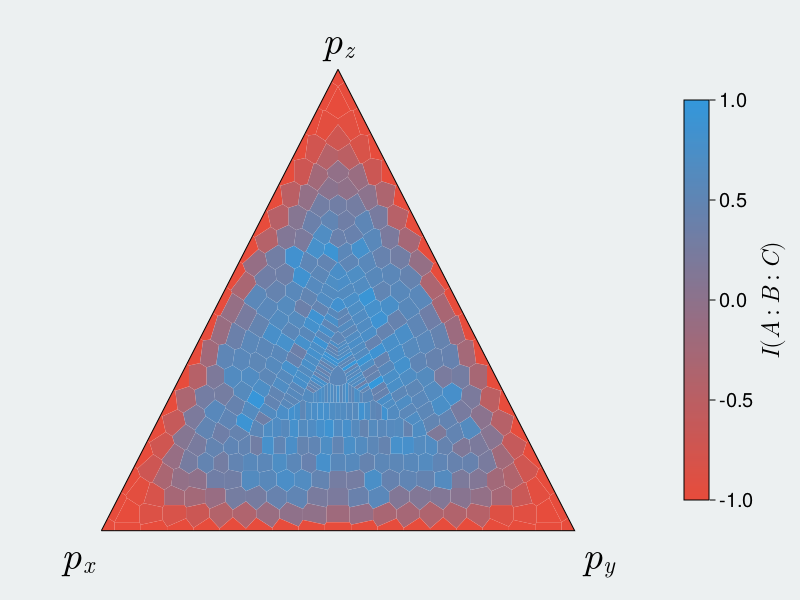

In [17]:
voronoi_tesselation_plot(LatticeCircuits.parametric_to_cartesian.(params), I3)

--- KekuleChainFull240 ---
Type: ChainKekule
Size: 240
Number of qubits: 240
Checkpoints: false
Verbosity: info
Thermalization steps: 720
Measurements: 100 @ 31 steps
Number of trajectories: 500


1177